In [1]:
import pandas as pd
import numpy as np
import json
import ast
import pylab as pl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime
import scipy as sp #library for scientific computations
from scipy import stats
from scipy.stats import kendalltau, pearsonr, spearmanr

# pre-processing read dataset businesess.json

In [14]:
# from json file to dataframe
file = 'yelp_academic_dataset_business.json'
# encoding -> chars to binary
# load -> reads from a file pointer
# loads -> reads from a string
with open(file,encoding='utf-8') as fh: # fh -> filehandle
    df = pd.DataFrame(json.loads(line) for line in fh)
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [16]:
# save businesses as csv
csv_name = "yelp_businesses_all.csv"
df.to_csv(csv_name, index=False)

In [27]:
# load csv for all businesses
df_businesses_all = pd.read_csv('yelp_businesses_all.csv')
df_businesses_all.shape

(150346, 14)

In [28]:
# pick only businesses in Philadelphia
df_phil = df_businesses_all[df_businesses_all.city == 'Philadelphia']
df_phil.shape

(14569, 14)

In [23]:
# find columns with null values
df_phil.isnull().sum()

business_id        0
name               0
address          526
city               0
state              0
postal_code        8
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      1170
categories         9
hours           2784
dtype: int64

In [24]:
# sum of all the null values
df_phil.isnull().sum().sum()

4497

In [37]:
# drop rows with Nan/null values
df_phil_clean = df_phil.dropna(how='any')
df_phil_clean.shape

(10692, 14)

In [82]:
# save to csv file the final dataframe with only philadelphia businesses and no null values
# to be able to retrieve it more easily
csv_name = "yelp_business_phil_no_null_values.csv"
df_phil.to_csv(csv_name, index=False)

In [75]:
# load csv for businesses
df_1 = pd.read_csv('yelp_business_phil_no_null_values.csv')
df_1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
10688,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': ""{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
10689,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
10690,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


# exercise 3-A

Text(0, 0.5, 'rank')

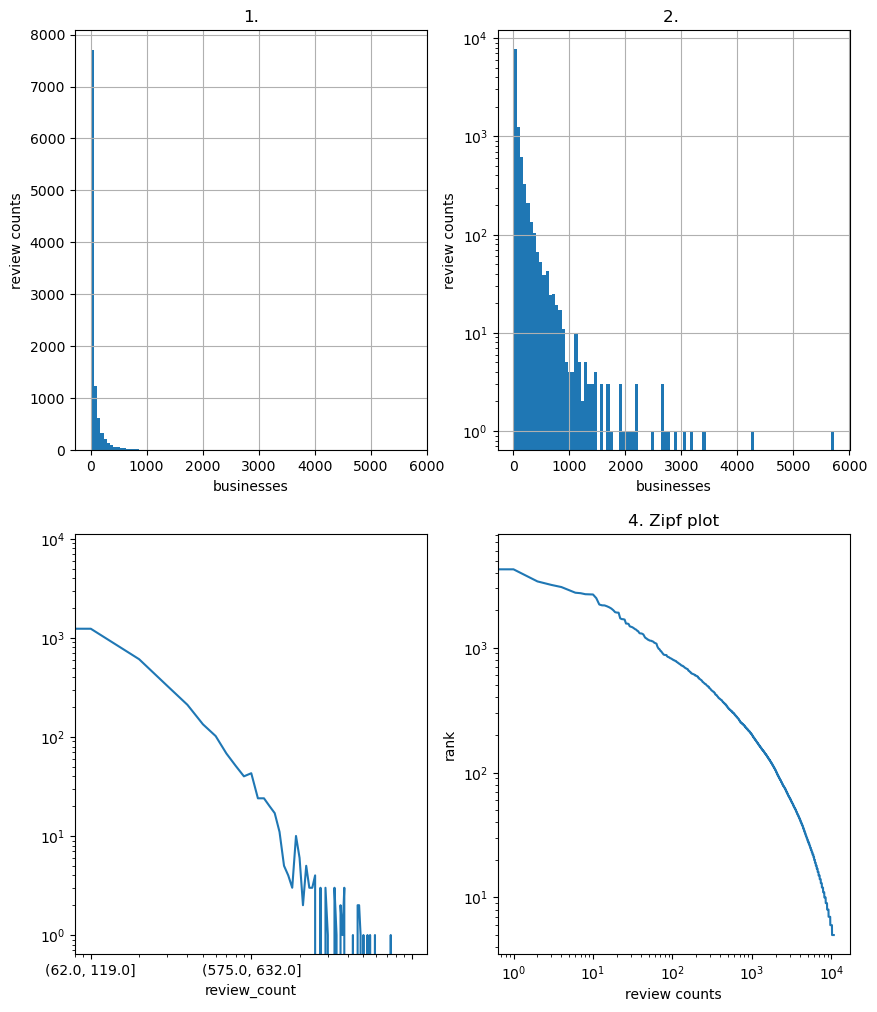

In [10]:
# 2x2 grid for the plots
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,12))

first= axes[0][0]
second = axes[0][1]
third = axes[1][0]
fourth = axes[1][1]

# 1
df_1.review_count.hist(bins=100,ax=first)
first.set_title('1.')
first.set_xlabel('businesses')
first.set_ylabel('review counts')

# 2
df_1.review_count.hist(bins=100, log=True,ax=second)
second.set_title('2. ')
second.set_xlabel('businesses')
second.set_ylabel('review counts')

# 3
intervals_length = np.ceil((df_1['review_count'].max() - df_1['review_count'].min()) // 100) # find the 100 intervals
xaxis = np.array([df_1['review_count'].min()])
for i in range(100):
    xaxis = np.append(xaxis, xaxis[i]+intervals_length) #[5,62),[63,)...
groups = pd.cut(df_1['review_count'], bins = xaxis)         # group analoga to xaxis kai ta review counts
yaxis = df_1.groupby(groups)['review_count'].count()        # count how many we have
yaxis.plot(x = xaxis,loglog=True,ax=third)

# 4
df_desc = df_1.sort_values(by=['review_count'], ascending =False)
df_desc = df_desc.reset_index()
df_desc['review_count'].plot(loglog=True,ax=fourth)
fourth.set_title('4. Zipf plot')
fourth.set_xlabel('review counts')
fourth.set_ylabel('rank')

# pre-processing read dataset reviews.json

In [69]:
size = 100000
review = pd.read_json('yelp_academic_dataset_review.json', lines=True, 
                      dtype={'review_id':str,'user_id':str, 
                             'business_id':str,'stars':int, 
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)
chunk_list = []
for chunk_review in review:
    # chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    chunk_review = chunk_review.rename(columns={'stars':'review_stars'}) # rename because in business and reviews their is the same name in the column
    chunk_merged = pd.merge(df_1,chunk_review, on = 'business_id',how='inner') # merge with the same business_id(their key)
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
df_bus_rev = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

15497 out of 100,000 related reviews
15766 out of 100,000 related reviews
15502 out of 100,000 related reviews
12917 out of 100,000 related reviews
10630 out of 100,000 related reviews
9895 out of 100,000 related reviews
9593 out of 100,000 related reviews
15144 out of 100,000 related reviews
16309 out of 100,000 related reviews
16416 out of 100,000 related reviews
14640 out of 100,000 related reviews
11942 out of 100,000 related reviews
10600 out of 100,000 related reviews
10436 out of 100,000 related reviews
14310 out of 100,000 related reviews
15025 out of 100,000 related reviews
15648 out of 100,000 related reviews
14442 out of 100,000 related reviews
11257 out of 100,000 related reviews
9672 out of 100,000 related reviews
9513 out of 100,000 related reviews
14697 out of 100,000 related reviews
16014 out of 100,000 related reviews
16206 out of 100,000 related reviews
14005 out of 100,000 related reviews
11694 out of 100,000 related reviews
10781 out of 100,000 related reviews
10111

In [70]:
df_bus_rev.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'review_stars', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')


In [71]:
# CONVERT NEW DATA FRAME into a CSV file
csv_name = "yelp_reviews_philadelphia.csv"
df_bus_rev.to_csv(csv_name, index=False)

In [72]:
#load csv for the reviews of the businesses
df_revs = pd.read_csv("yelp_reviews_philadelphia.csv")
df_revs

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885250,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,"Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",qBcwQEQPnLxjkw-xbUIF4Q,6nF5PT1c0dF6EpOgQdF2tw,5,0,0,0,Ordered delivery for some tacos on a Saturday ...,2020-12-06 00:19:29
885251,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,"Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",G8fbysnUAUmqq1XWTjMQ4Q,1M78_w4J9f5S8xmUVYyxdQ,5,2,1,1,First time trying this restaurant and I had a ...,2020-11-30 23:19:40
885252,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,"Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",JKiy0aeyGd3KmXN7uRPFLw,B7TD5yTemGv50y4wM2EVNA,5,1,1,1,This restaurant is truly amazing!!! The owner ...,2021-03-27 19:33:29
885253,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,"Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",JITY01bGbdsiUBznLz9rdg,HI8QwhpeP_ZRY5JZy11VDw,4,1,0,0,Recently got take out from adelita; they were ...,2021-02-07 15:09:25


# exercise 3-B

<AxesSubplot:xlabel='count_months', ylabel='review_stars'>

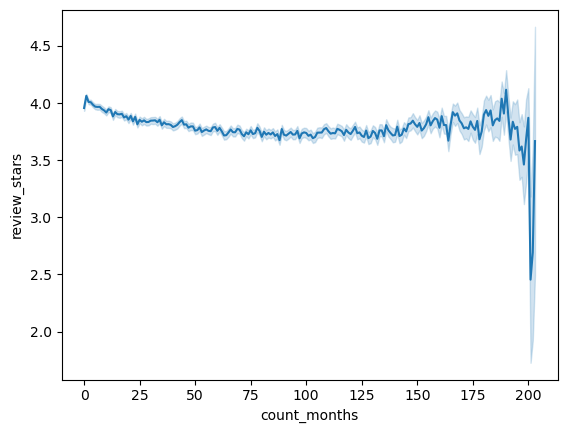

In [389]:
# find min date of every business

# group businesses and take their first review date
df_revs_min_date = df_revs[['business_id','date']].groupby('business_id').min() 
df_revs_min_date = df_revs_min_date.reset_index() # reset indexes to be able to use the columns name and date
# merge the dataframes (date_x:to kanoniko , date_y:to prwto review)
df_revs_dates = pd.merge(df_revs,df_revs_min_date, on = 'business_id')

# find for each date the month from the first review
df_revs_dates['date_x'] = df_revs_dates['date_x'].astype('datetime64[ns]')
df_revs_dates['date_y'] = df_revs_dates['date_y'].astype('datetime64[ns]')
df_revs_dates['count_months'] = (np.ceil((df_revs_dates.date_x - df_revs_dates.date_y) / np.timedelta64(1,'M'))).astype(int)

sns.lineplot(x='count_months',y='review_stars',data=df_revs_dates,ci=95) # with confidence interval 95%

# mean from review stars for each month
#df_revs_dates_stars = df_revs_dates[['review_stars','count_months']].groupby('count_months').mean()
#sns.lineplot(x='count_months',y='review_stars',data=df_revs_dates_stars,ci=95) # with confidence interval 95%

<AxesSubplot:xlabel='count_months', ylabel='review_stars'>

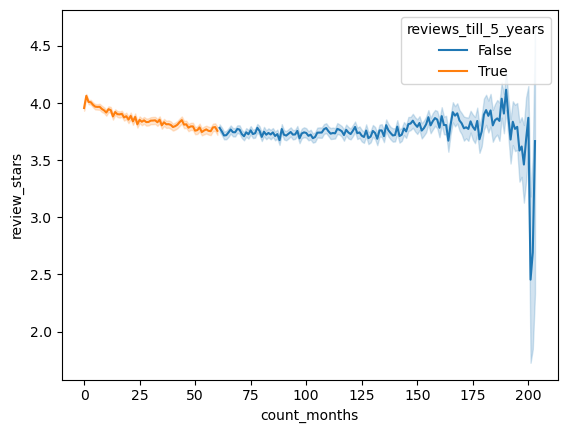

In [390]:
# see the difference between first 5 years of reviews and after 5 years
df_revs_dates['reviews_till_5_years'] = (df_revs_dates.count_months <= 60)
sns.lineplot(x='count_months',y='review_stars',hue='reviews_till_5_years',data=df_revs_dates,ci=95) # with confidence interval 95%
# True = first 5 years, from the first review (orange)
# False = after 5 years, from the first review (blue)

Παρατήρηση: 
    Αρχικά βλέπουμε πως για κάθε επιχείρηση όσο περνάνε τα χρόνια η βαθμολογία των αστεριών μειώνεται. Όμως, παρατηρούμε πως τα 5 πρώτα χρόνια αυτή η μείωση είναι πιο απότομη σε σχέση με τα reviews που γίνονται μετά τα 5 χρόνια. Αυτό είναι φυσιολογικό διότι στη αρχή μια επιχείρηση λειτουργεί βάση σχεδίων και προγραμματισμών άρα είναι αναμενόμενο, να παίρνει υψηλές βαθμολογίες. Επίσης, βλέπουμε μια μικρή αύξηση των βαθμολογιών τους πρώτους μήνες που σημαίνει πως οι επιχειρήσεις λειτουργούσαν σε άριστη κατάσταση. Στη συνέχεια, μέχρι τα 5 χρόνια βλέπουμε μια έντονη/απότομη πτώση των βαθμολογιών, το όποιο εξηγείται λόγω λαθών που μπορεί να γίνονται ή αλλαγών. Είναι πολύ δύσκολο μια επιχείρηση να κρατήσει τα υψηλά στάνταρ που έθεσε ξεκινώντας, για 5 συνεχόμενα χρόνια. Μετά τα 5 χρόνια παρατηρούμε ότι η επιχείρηση έχει θέσει κάποια θεμέλια-κάποιο σταθερό κοινό στο οποίο απευθύνεται και εστιάζει σε αυτά, για αυτό το λόγω η μέση βαθμολογία στην οποία κυμαίνεται παραμένει σταθερή με μικρές πτώσεις ή μικρές αυξήσεις που δεν επηρεάζουντην γενική μορφή της γραφικής μας παράστασης. Μετά τα 15 χρόνια περίπου παρατηρούμε πως φέρεται περίεργα η γραφική μας παράσταση, θα θεωρήσουμε πως έχουμε outliers διότι δεν υπάρχει μεγάλο ποσό επιχειρήσεων που περνάει τα 15 χρόνια για να έχουμε κάποιο γενικό συμπέρασμα, αλλά μόνο μεμονομένα συμπεράσματα για συγκεκριμένες επιχειρήσεις

# Exercise 3-C

In [12]:
df_c = pd.read_csv('RedfinPhila.tsv',sep='\t',header=0)
df_region_msp = df_c[['region','median_sale_price']] #msp : median_sale_price
df_region_msp

,region,median_sale_price
0,Zip Code: 19070,252438.0
1,Zip Code: 19078,580000.0
2,Zip Code: 19043,219900.0
3,Zip Code: 19124,55125.0
4,Zip Code: 19124,69000.0
...,...,...
45239,Zip Code: 19041,1200819.0
45240,Zip Code: 19079,50000.0
45241,Zip Code: 19127,208500.0
45242,Zip Code: 44663,90500.0


In [13]:
# check for null values
df_region_msp.isnull().sum()

region               0
median_sale_price    0
dtype: int64

In [14]:
# for each region keep the mean price
df_region_groups = df_region_msp.groupby('region').mean()
df_region_median = df_region_groups.reset_index()
df_region_median['region'] = df_region_median['region'].str[10:16] # keep only the number of the zip code(drop the : Zip Code:)
df_region_median

,region,median_sale_price
0,19003,348269.932594
1,19008,309258.622892
2,19010,469248.786871
3,19013,52576.980159
4,19014,207546.861213
...,...,...
101,44680,163104.027778
102,44681,160778.439441
103,44682,97083.503401
104,44683,74737.369369


In [18]:
# mean for star reviews for every postal code
df_mean_stars = df_1[['postal_code','stars']].groupby('postal_code').mean()
df_mean_stars = df_mean_stars.reset_index()
df_mean_stars.head()

,postal_code,stars
0,19006,4.5
1,19012,5.0
2,19014,3.5
3,19019,4.0
4,19020,3.0


In [19]:
df_mean_stars.shape

(69, 2)

In [23]:
# sum for businesses for every postal code
df_sum_busin = df_1[['postal_code']].groupby('postal_code').value_counts()
df_sum_busin = df_sum_busin.reset_index()
df_sum_busin

,postal_code,0
0,19006,1
1,19012,1
2,19014,1
3,19019,1
4,19020,1
...,...,...
64,19176,19
65,19195,8
66,19406,1
67,19446,1


In [24]:
# merge base on their postal codes
df_revs_c = pd.merge(df_sum_busin,df_mean_stars,on='postal_code')
df_revs_c.head()

,postal_code,0,stars
0,19006,1,4.5
1,19012,1,5.0
2,19014,1,3.5
3,19019,1,4.0
4,19020,1,3.0


In [25]:
df_revs_c.shape

(69, 3)

In [26]:
# rename column
df_revs_c = df_revs_c.rename(columns = {0:'sum_businesses','postal_code':'region'})
df_revs_c.head()

,region,sum_businesses,stars
0,19006,1,4.5
1,19012,1,5.0
2,19014,1,3.5
3,19019,1,4.0
4,19020,1,3.0


In [27]:
# change region type to merge 
df_revs_c['region'] = df_revs_c['region'].apply(np.int64)
df_revs_c['region'] = df_revs_c['region'].apply(str)

In [28]:
df_final_c = pd.merge(df_revs_c,df_region_median,on='region',how='inner')
df_final_c.head()

,region,sum_businesses,stars,median_sale_price
0,19014,1,3.500000,207546.861213
1,19023,1,2.000000,80747.046260
2,19102,425,3.675294,596292.791304
3,19103,1016,3.802657,671583.041111
4,19104,572,3.486888,260677.601986


In [29]:
df_final_c.shape

(50, 4)

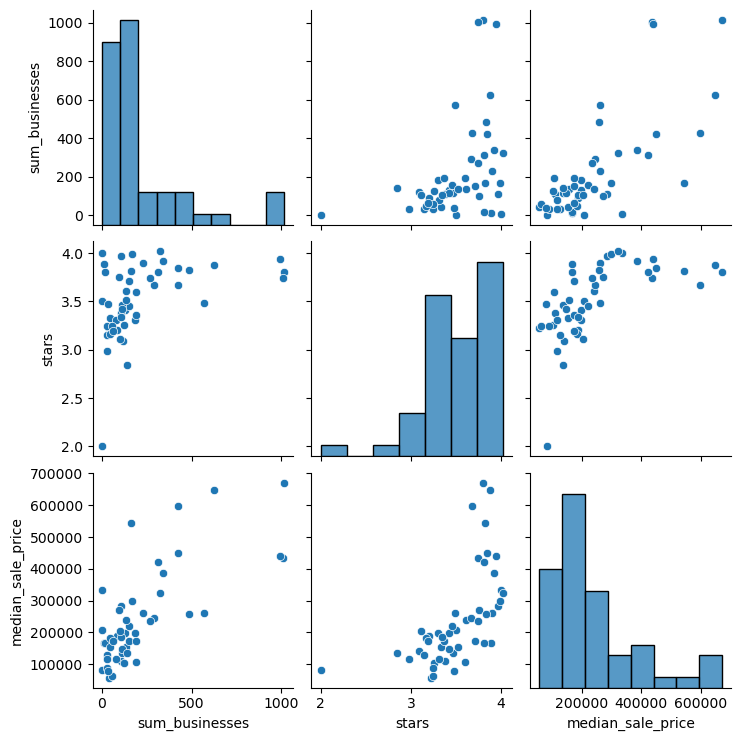

In [33]:
sns.pairplot(df_final_c)

In [31]:
#Pearson p-value
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

CORRELATION 		 P-value
AxesSubplot(0.125,0.11;0.281818x0.77)
AxesSubplot(0.547727,0.11;0.281818x0.77)


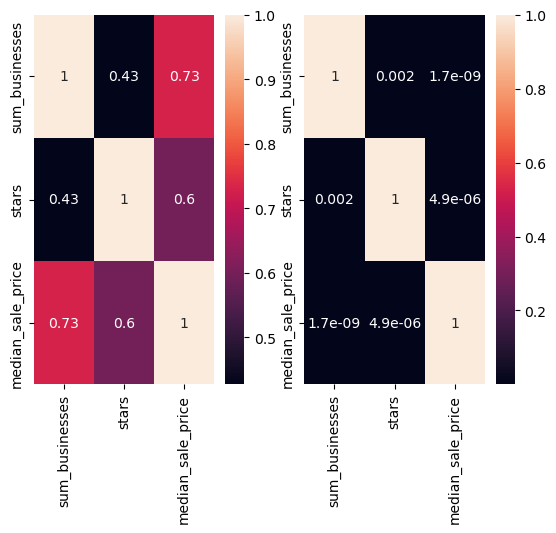

In [36]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
# Pearson correlation coefficient
correlation = df_final_c.corr()
correlation_heatmap = sns.heatmap(correlation,annot=True,ax=ax1)
print(correlation_heatmap)

p_value = df_final_c.corr(method=pearsonr_pval)
p_value_heatmap = sns.heatmap(p_value,annot=True,ax=ax2)
print(p_value_heatmap)

Παρατήρηση

Παρατηρούμε πως όλες οι συσχετίσεις είναι ενδιαφέρουσες διότι έχουν μεγάλο coefficient και μικρή τιμή στο p-value. Όμως 
παρατηρούμε πως τα p-values για την συσχέτιση του sum_businesses με το median_sale_price και του stars με το median_sale_price
έχουν πολύ μικρές τιμές όμως θα θεωρήσουμε πως είναι στατιστικά ενδιαφέρουσες. Η σχέση του stars με το sum_businesses είναι στατιστικά σημαντική και θα έχει και κάποιο scientific interest.
Παρατηρώντας τα plot 3x3 πάνω μπορούμε να βγάλουμε το συμπέρασμα πως οι περιοχές που είναι ακριβές θα έχουν αρκετά καλές επιχειρήσεις αφού βλέπουμε πως έχουν πολύ υψηλές βαθμολογίες όλες οι επιχειρήσεις που βρίσκονται πάνω από μέση τιμή τα 40000
(στη σχέση stars με median-sale-price). Όμως δεν μπορούμε σίγουρα να πούμε πως θα είναι και πάρα πολλές επιχειρήσεις σε εκείνη την περιοχή αφού βλέπουμε πολύ ακριβές περιοχές να έχουν και κάτω από 500 επιχειρήσεις (στη σχέση sum_businesses με median-sale-price).

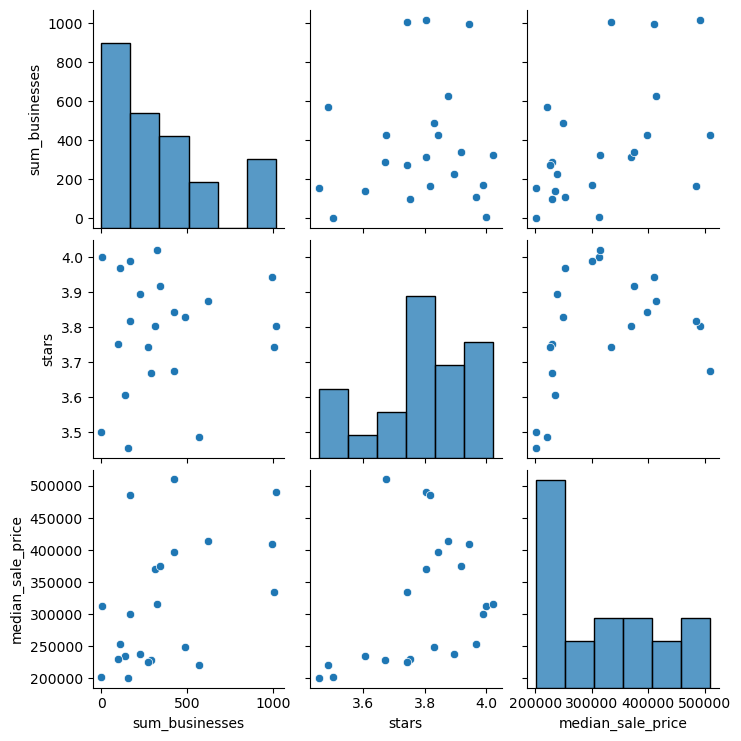

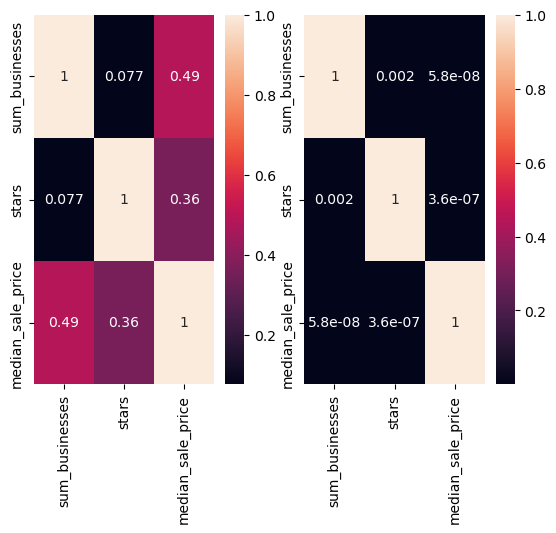

In [553]:
df_final_c_smaller_than = df_final_c[df_final_c['median_sale_price']>= 200000]
sns.pairplot(df_final_c_smaller_than) # grafikh me pairplot seaborn zhteitai

fig,(ax1,ax2) = plt.subplots(ncols=2)  # gia na bgoun duo heatmaps
correlation_smaller = df_final_c_smaller_than.corr()
correlation_heatmap_smaller = sns.heatmap(correlation_smaller,annot=True,ax=ax1)

#Pearson p-value
p_value = df_final_c.corr(method=pearsonr_pval)
p_value_heatmap_smaller = sns.heatmap(p_value,annot=True,ax=ax2)

Αφαιρώντας τις φτηνές περιοχές παρατηρούμε ότι το coefficient για την σχέση stars με sum_businesses μειώθηκε κατά πολύ, δηλαδή
δεν θα έχει πλέον κάποια στατιστική σημασία παρόλο που το p-value παραμένει μικρό.
Για την σχέση stars με median-sale-price μπορούμε να δούμε πως και για αυτή μειώθηκε το coefficient άρα το στατιστικό της αποτέλεσμα δεν ξέρουμε αν θα είναι τόσο σημαντικό, παρατηρούμε όμως ακόμα πως περιοχές με μεγ.
Η σχέση των sum_businesses με το median-sale-price παρατηρούμε πως παρέμεινε ψηλά το coefficient αλλά και χαμηλά το p-value άρα
θα συνεχίσει να έχει κάποιο στατιστικό ενδιαφέρον. Θα θεωρήσουμε πως το p-value δεν είναι τόσο μικρό ώστε να μην έχει κάποιο 
scientific interest.

Το συμπέρασμα για την αρχική μας υπόθεση είναι πως ακριβές περιοχές είναι αυτές που περιέχουν πολλές επιχειρήσεις, 
όπως φαίνεται και από την σχέση sum_businesses με το median-sale-price

# exercise 3-D

In [37]:
df_1 # gia ta businesses pou tha xrhsimopoihsw

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
10688,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': ""{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
10689,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
10690,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [9]:
# from businesses keep only restaurants
# a) with loc we take every row
# b) check (with boolean) if the column categories contains Restaurant
# c) keep the row
df_restaurants = df_1[df_1['categories'].str.contains('Restaurants')]
df_restaurants = df_restaurants.reset_index()
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [10]:
df_restaurants.shape

(4810, 15)

In [11]:
# make each atribute from str -> dictionary
dict_row = df_restaurants.attributes.apply(eval)
dict_row

0       {'RestaurantsDelivery': 'False', 'OutdoorSeati...
1       {'RestaurantsReservations': 'True', 'Restauran...
2       {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...
3       {'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...
4       {'RestaurantsReservations': 'False', 'Caters':...
                              ...                        
4805    {'BikeParking': 'True', 'WheelchairAccessible'...
4806    {'RestaurantsGoodForGroups': 'True', 'Business...
4807    {'NoiseLevel': 'u'average'', 'RestaurantsTakeO...
4808    {'RestaurantsGoodForGroups': 'True', 'BikePark...
4809    {'WheelchairAccessible': 'False', 'Restaurants...
Name: attributes, Length: 4810, dtype: object

In [6]:
# attribute 'RestaurantsPriceRange2'
df_restaurants['quality_restaurants'] = dict_row.iloc[:].apply(lambda x: 'cheap' if x.get('RestaurantsPriceRange2') == '1' or x.get('RestaurantsPriceRange2')=='2' else
                                                                ('expensive' if x.get('RestaurantsPriceRange2') == '3' or x.get('RestaurantsPriceRange2')=='4' else None))
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,quality_restaurants
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",cheap
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",cheap
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",cheap
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",cheap
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",cheap


In [7]:
df_restaurants.shape

(4810, 16)

In [9]:
# drop values that are None
df_rests_plot = df_restaurants.dropna(how='any')
df_rests_plot.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,quality_restaurants
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",cheap
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",cheap
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",cheap
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",cheap
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",cheap


In [10]:
df_rests_plot.shape

(4107, 16)

<AxesSubplot:xlabel='quality_restaurants', ylabel='stars'>

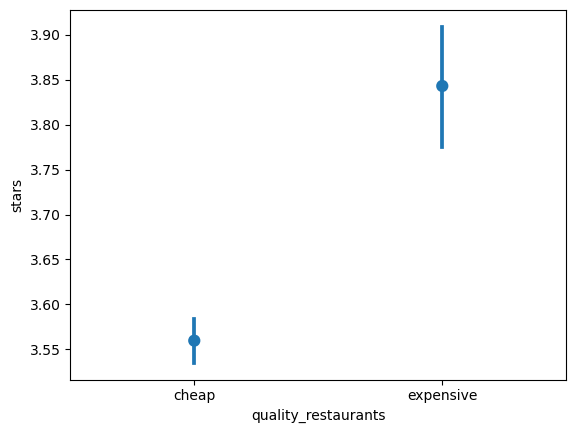

In [423]:
sns.pointplot(x='quality_restaurants', y='stars', data=df_rests_plot, join=False, ci=95)

Παρατήρηση

Στο παραπάνω plot παρατηρούμε το αποτέλεσμα που θα περιμέναμε, δηλαδή πως το range των αστεριών που έχουν τα ακριβά εστιατόρια
είναι μεγαλύτερο από αυτό των φτηνών εστιατορίων. Αυτο φαίνεται και λόγω της μέσης τιμής που στα ακριβά εστιρατόρια 
ειναι 3,85 ενώ στα φτηνά είναι στο 3,56 αλλά και από το range τους που στα ακριβά ειναι από 3,77-3,91 ενώ στα φτηνά από
3,53-3,59. Το μικρό range των φτηνών εστιατορίων μας δείχνει πως είναι αρκετά ακριβής η μέτρηση της μέσης τιμής στο 3,56.

In [613]:
# t-test (test statistical difference)
cheap = df_rests_plot[df_rests_plot['quality_restaurants'] =='cheap']
expensive = df_rests_plot[df_rests_plot['quality_restaurants'] == 'expensive']
stats.ttest_ind(cheap.stars,expensive.stars,equal_var=False)

Ttest_indResult(statistic=-7.833385745614644, pvalue=1.1292790373114164e-13)

Συμπέρασμα

Μετά τον υπολογισμό της p-value η οποία είναι μικρότερη και από το 0,05 αλλά και από το πιο αυστηρό 0,01 είναι ξεκάθαρο
πως τα δεδομένα μας είναι στατιστικά σημαντικά. Όμως δεν πρέπει να παραλήψουμε πως η τιμή του p-value ειναι πολύ μικρή 
τάξης -13 που σημαίνει πως δεν θα είχε κάποιο scientific interest να βγάλουμε κάποιο συμπέρασμα με τα δεδομένα αυτά.

In [11]:
# attribute 'RestaurantsAttire'
df_restaurants['attire_restaurants'] = dict_row.iloc[:].apply(lambda x: 'formal' if x.get('RestaurantsAttire') != None and ('dressy' in x.get('RestaurantsAttire') or 'formal' in x.get('RestaurantsAttire')) else
                                                                    ('casual' if x.get('RestaurantsAttire') != None and ('casual' in x.get('RestaurantsAttire')) else None))
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,quality_restaurants,attire_restaurants
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",cheap,None
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",cheap,casual
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",cheap,casual
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",cheap,casual
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",cheap,casual


In [12]:
df_restaurants.shape

(4810, 17)

In [13]:
# drop values that are None
df_attire = df_restaurants.dropna(how='any')
df_attire.shape

(3567, 17)

<AxesSubplot:xlabel='attire_restaurants', ylabel='stars'>

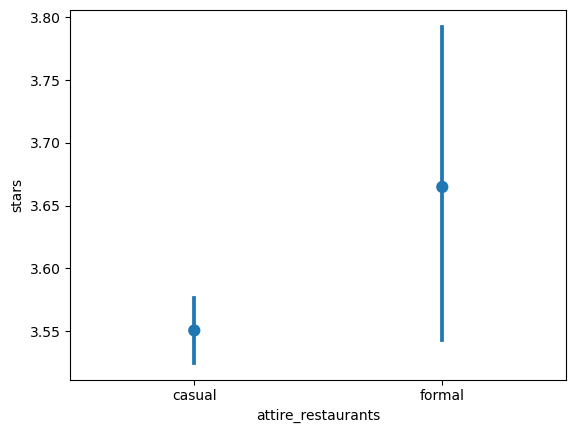

In [14]:
sns.pointplot(x='attire_restaurants', y='stars', data=df_attire, join=False, ci=95)
#sns.pointplot(data=df_stars_quality, join=False, ci=95)

Παρατήρηση

Σε αυτό το plot βλέπουμε πως τα εστιατόρια που έχουν casual ενδυμασία έχουν μέση τιμή βαθμολογιών στα 3,55 αστέρια ενώ 
τα εστιατόρια που έχουν πιο formal ενδυμασία έχουν μέση τιμή βαθμολογιών στα 3,67 αστέρια. Όμως το πιο σημαντικό δεδομένο
που παρατηρούμε σε αυτό το plot είναι πως τα εστιτόρια με casual ενδυμασία έχουν πολύ μικρό range αστεριών στις βαθμολογίες
τους, δηλαδή τα περισσότερα εστιατόρια που θα ακολουθήσουν το casual ντύσιμο θα κυμαίνονται σε μέσο όρο αστεριών 3,51-3,57. 
Αντίθετα, στα εστιατόρια που έχουν formal ενδυμασία βλέπουμε το range τιμών τους να είναι από το 3,55-3,79, αυτό μας δείχνει 
το gap που υπάρχει ανάμεσα στα εστιατόρια που έχουν formal ντύσιμο. Πιο συγκεκριμένα, αυτό μπορεί να οφείλεται στο γεγονός
πως όταν σε κάποιο εστιατόριο είναι formal το ντύσιμο τα expectations των πελατών είναι πιο υψηλά με αποτέλεσμα κάποιοι να 
είναι πιο αυστηροί. Αυτό το range μπορεί να ευθύνεται και λόγο της μεγάλης διαφοράς σε ποιότητα ανάμεσα στα εστιατόρια
με formal ενδυμασία, δηλαδή το γεγονός πως κάποια από αυτά παρέχουν άψογες υπηρεσίες ενώ άλλα κάπως πιο ελλιπης σε σχέση με
τα πρώτα.

In [615]:
# t-test (test statistical difference)
casual = df_rests_plot[df_rests_plot['attire_restaurants'] =='casual']
formal = df_rests_plot[df_rests_plot['attire_restaurants'] == 'formal']
stats.ttest_ind(casual.stars,formal.stars,equal_var=False)

Ttest_indResult(statistic=-1.507030061842685, pvalue=0.13530471398459493)

Συμπέρασμα

Μετά τον υπολογισμό του t-test βλέπουμε πως το p-value έχει τιμή μεγαλύτερη από το 0,05 που σημαίνει πως δεν έχει κάποιο
στατιστικό ενδιαφέρον να βγάλουμε κάποια συμπεράσματα για την συγκεκριμένη υπόθεση.

# exercise 3-E

In [15]:
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,quality_restaurants,attire_restaurants
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",cheap,None
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",cheap,casual
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",cheap,casual
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",cheap,casual
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",cheap,casual


In [16]:
df_restaurants.shape

(4810, 17)

In [12]:
# attribute 'ambience', check if this attribute-key exists and keep its value
df_restaurants['ambience'] = dict_row.iloc[:].apply(lambda x: x.get('Ambience') if x.get('Ambience') != None else None)                                                                    
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ambience
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",None
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...","{'touristy': False, 'hipster': False, 'romanti..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...","{'touristy': False, 'hipster': False, 'romanti..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...","{'touristy': False, 'hipster': True, 'romantic..."
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...","{'romantic': False, 'intimate': False, 'classy..."


In [13]:
df_restaurants.shape

(4810, 16)

In [14]:
# drop values that are None = didn't had the attribute Ambience
df_rests_amb = df_restaurants.dropna(how='any')
df_rests_amb.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ambience
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...","{'touristy': False, 'hipster': False, 'romanti..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...","{'touristy': False, 'hipster': False, 'romanti..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...","{'touristy': False, 'hipster': True, 'romantic..."
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...","{'romantic': False, 'intimate': False, 'classy..."
5,5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...","{'touristy': False, 'hipster': False, 'romanti..."


In [15]:
df_rests_amb.shape

(3924, 16)

In [16]:
# make each atribute from str -> dictionary
dict_ambience = df_rests_amb.ambience.apply(eval)
dict_ambience.head()

1    {'touristy': False, 'hipster': False, 'romanti...
2    {'touristy': False, 'hipster': False, 'romanti...
3    {'touristy': False, 'hipster': True, 'romantic...
4    {'romantic': False, 'intimate': False, 'classy...
5    {'touristy': False, 'hipster': False, 'romanti...
Name: ambience, dtype: object

In [17]:
df_ambience = dict_ambience.to_frame()
df_ambience.head()

,ambience
1,"{'touristy': False, 'hipster': False, 'romanti..."
2,"{'touristy': False, 'hipster': False, 'romanti..."
3,"{'touristy': False, 'hipster': True, 'romantic..."
4,"{'romantic': False, 'intimate': False, 'classy..."
5,"{'touristy': False, 'hipster': False, 'romanti..."


In [18]:
df_ambience.shape

(3924, 1)

In [19]:
# see the null values that presented
df_ambience.isnull().sum()

ambience    32
dtype: int64

In [20]:
# drop the new values tha presented in the dataframe
df_ambience = df_ambience.dropna(how='any')
df_ambience.head()

,ambience
1,"{'touristy': False, 'hipster': False, 'romanti..."
2,"{'touristy': False, 'hipster': False, 'romanti..."
3,"{'touristy': False, 'hipster': True, 'romantic..."
4,"{'romantic': False, 'intimate': False, 'classy..."
5,"{'touristy': False, 'hipster': False, 'romanti..."


In [21]:
# the new clean dataframe
df_ambience.shape

(3892, 1)

In [22]:
df_ambience = df_ambience.reset_index()
df_ambience.head()

,index,ambience
0,1,"{'touristy': False, 'hipster': False, 'romanti..."
1,2,"{'touristy': False, 'hipster': False, 'romanti..."
2,3,"{'touristy': False, 'hipster': True, 'romantic..."
3,4,"{'romantic': False, 'intimate': False, 'classy..."
4,5,"{'touristy': False, 'hipster': False, 'romanti..."


In [23]:
# in column ambience search for romantic or intimate and classy or upscale
df_ambience['good_for_date'] = df_ambience.ambience.apply(lambda x: '1' if x.get('romantic') != None and x.get('romantic') == True else
                                                                   ('1' if x.get('intimate') != None and x.get('intimate') == True else '0'))
df_ambience

,index,ambience,good_for_date
0,1,"{'touristy': False, 'hipster': False, 'romanti...",0
1,2,"{'touristy': False, 'hipster': False, 'romanti...",0
2,3,"{'touristy': False, 'hipster': True, 'romantic...",0
3,4,"{'romantic': False, 'intimate': False, 'classy...",0
4,5,"{'touristy': False, 'hipster': False, 'romanti...",0
...,...,...,...
3887,4803,"{'divey': False, 'hipster': None, 'casual': Tr...",0
3888,4806,"{'touristy': False, 'hipster': False, 'romanti...",1
3889,4807,"{'touristy': None, 'hipster': False, 'romantic...",0
3890,4808,"{'romantic': False, 'intimate': False, 'classy...",0


In [24]:
df_ambience['luxury'] = df_ambience.ambience.apply(lambda x: '1' if x.get('classy') != None and x.get('classy') == True else
                                                            ('1' if x.get('upscale') != None and x.get('upscale') == True else '0'))
df_ambience

,index,ambience,good_for_date,luxury
0,1,"{'touristy': False, 'hipster': False, 'romanti...",0,1
1,2,"{'touristy': False, 'hipster': False, 'romanti...",0,0
2,3,"{'touristy': False, 'hipster': True, 'romantic...",0,0
3,4,"{'romantic': False, 'intimate': False, 'classy...",0,0
4,5,"{'touristy': False, 'hipster': False, 'romanti...",0,1
...,...,...,...,...
3887,4803,"{'divey': False, 'hipster': None, 'casual': Tr...",0,0
3888,4806,"{'touristy': False, 'hipster': False, 'romanti...",1,0
3889,4807,"{'touristy': None, 'hipster': False, 'romantic...",0,0
3890,4808,"{'romantic': False, 'intimate': False, 'classy...",0,0


In [25]:
# x^2-test
# the contigency table for the 2 attributes (an aneksarthta)
cdf = pd.crosstab(df_ambience['good_for_date'],df_ambience['luxury'])
cdf
# 0 = False
# 1 = True

luxury,0,1
good_for_date,,
0,3004,684
1,99,105


Παρατήρηση


Από το contigency table παρατηρούμε πως τα δύο χαρακτηριστικά δεν είναι ανεξάρτητα. Αυτό φαίνεται διότι 
ο αριθμός των εστιατορίων που είναι good_for_date είναι λιγότερα από ότι αυτά που είναι good_for_date και luxury.
Δηλαδή συμπεραίνουμε πως υπάρχει εξάρτηση ανάμεσα στα χαρακτηριστικά αυτα.

In [115]:
chi2, p, dof, expected = stats.chi2_contingency(cdf)
print('chi2 = ',chi2)
print('p = ',p)
print('dof = ',dof)
print('expected = ',expected)

chi2 =  127.61693241268836
p =  1.3613890491392183e-29
dof =  1
expected =  [[2940.35560123  747.64439877]
 [ 162.64439877   41.35560123]]


Υποθέτουμε level of significance a = 0.05

Άρα παρατηρούμε πως το p-value είναι μικρότερο από το level of significance(a) άρα απορρίπτουμε το null hypothesis το οποίο ήταν πως τα χαρακτηριστικά ήταν ανεξάρτητα, άρα είναι εξαρτημένα.


Άρα τώρα υποθέτουμε πως το contigency table που θα φτιάξουμε θέλουμε να είναι τα δύο χαρακτηριστικά ανεξάρτητα, με significance level a=0,05. Οπότε για να μπορούμε να ελένξουμε τα χαρακτηριστικά θέλουμε το p-value να είναι μικρότερο του 0,05 και ο πίνκας να είναι της μορφής.

# Bonus

Eρώτηση

Μια υπόθεση που θα ήθελα να εξετάσω μέσα από αυτό το dataset είναι η εξής:
Θα χρησιμοποιήσουμε τα δεδομένα με τα εστιατόρια και θα εξετάσουμε τη συσχέτιση μεταξύ του χαρακτηριστικού 'Smoke' και των 'stars' που θα έχει το εστιατόριο.
Πιο συγκεκριμένα, από το dataframe των εστιατορίων να πάρουμε μόνο τα εστιατόρια που είναι ανοιχτά, αυτό το κάνουμε για να μην επηρεαστούμε από εστιατόρια που πλέον έχουν κλείσει. Στη συνέχεια, από το πεδίο attributes να πάρουμε το attribute 'Smoke' το οποίο έχει τιμές 'yes' και 'no'. Μετά, να δημιουργήσουμε ένα pointplot που να δείχνει τον μέσο όρο star rating για τα εστιατόρια που επιτρέπεται το κάπνισμα και για τα εστιατόρια που δεν επιτρέπεται το κάπνισμα, να συμπληρώσουμε και το 95% confidence interval.
Σημείωση: Το attribute 'Smoke' δεν ειναι απαραίτητο πως περιέχει clean data αλλά ούτε πως έχει τιμές για όλες τις γραμμές του dataframe των εστιατορίων.

In [101]:
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ambience
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",None
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...","{'touristy': False, 'hipster': False, 'romanti..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...","{'touristy': False, 'hipster': False, 'romanti..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...","{'touristy': False, 'hipster': True, 'romantic..."
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...","{'romantic': False, 'intimate': False, 'classy..."


In [102]:
df_restaurants.shape

(4810, 16)

In [105]:
# pick only businesses in Philadelphia
df_closed = df_restaurants[df_restaurants['is_open'] == 1]
df_closed.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ambience
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",None
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...","{'touristy': False, 'hipster': False, 'romanti..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...","{'touristy': False, 'hipster': False, 'romanti..."
5,5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...","{'touristy': False, 'hipster': False, 'romanti..."
6,7,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","{'romantic': False, 'intimate': False, 'classy..."


In [106]:
df_closed.shape

(3013, 16)

In [107]:
df_closed = df_closed.reset_index()
dict_smoking = df_closed.attributes.apply(eval)
dict_smoking.head()

0    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
1    {'RestaurantsReservations': 'True', 'Restauran...
2    {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...
3    {'OutdoorSeating': 'True', 'RestaurantsPriceRa...
4    {'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...
Name: attributes, dtype: object

In [108]:
df_closed['smoke'] = dict_smoking.iloc[:].apply(lambda x: 'yes' if x.get('Smoking') != None and 'no' in x.get('Smoking') else
                                                     ('no' if x.get('Smoking') != None and 'yes' in x.get('Smoking') else None))
df_closed.head()

,level_0,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ambience,smoke
0,0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",None,None
1,1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...","{'touristy': False, 'hipster': False, 'romanti...",None
2,2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...","{'touristy': False, 'hipster': False, 'romanti...",None
3,5,5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...","{'touristy': False, 'hipster': False, 'romanti...",None
4,6,7,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","{'romantic': False, 'intimate': False, 'classy...",None


In [109]:
df_closed.shape

(3013, 18)

In [110]:
# drop values that are None
df_closed = df_closed.dropna(how='any')
df_closed.head()

,level_0,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ambience,smoke
12,18,41,7mpYTDb24SywNMRn3yeakQ,The Twisted Tail,509 S 2nd St,Philadelphia,PA,19147,39.941877,-75.145199,4.0,604,1,"{'BusinessParking': ""{'garage': False, 'street...","Event Planning & Services, Whiskey Bars, Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ...","{'touristy': False, 'hipster': False, 'romanti...",yes
25,41,83,BxR5hjyBnJZrm_nnaCtGQw,The Lunar Inn,3124 Richmond St,Philadelphia,PA,19134,39.982293,-75.103160,4.5,29,1,"{'BusinessParking': ""{'garage': False, 'street...","Bars, Food, Restaurants, Beer, Wine & Spirits,...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ...","{u'divey': None, u'hipster': True, u'casual': ...",yes
26,43,87,NQSnr4RPUScss607oxOaqw,Chase's Hop Shop,7235 Rising Sun Ave,Philadelphia,PA,19111,40.060386,-75.084590,4.5,116,1,"{'RestaurantsReservations': 'False', 'Alcohol'...","Chicken Wings, Nightlife, Bars, Delis, Food, B...","{'Monday': '0:0-0:0', 'Tuesday': '13:15-20:30'...","{'romantic': False, 'intimate': False, 'classy...",yes
53,86,178,7lwe7n-Yc-V9E_HfLAeylg,Pub & Kitchen,1946 Lombard St,Philadelphia,PA,19146,39.945657,-75.174773,3.5,615,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Restaurants, Pubs, Food, Bars, American (New),...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...","{'touristy': False, 'hipster': False, 'romanti...",yes
54,87,180,5m3ND7lNNd6zo-bNQGoXhQ,Three 12 Sport Bar and Lounge,312 Market St,Philadelphia,PA,19106,39.949945,-75.146352,2.5,33,1,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Lounges, Sports Bars, Bars, Cocktail Bars, Nig...","{'Monday': '11:0-1:30', 'Tuesday': '11:0-1:30'...","{'touristy': False, 'hipster': False, 'romanti...",yes


In [111]:
df_closed.shape

(201, 18)

<AxesSubplot:xlabel='smoke', ylabel='stars'>

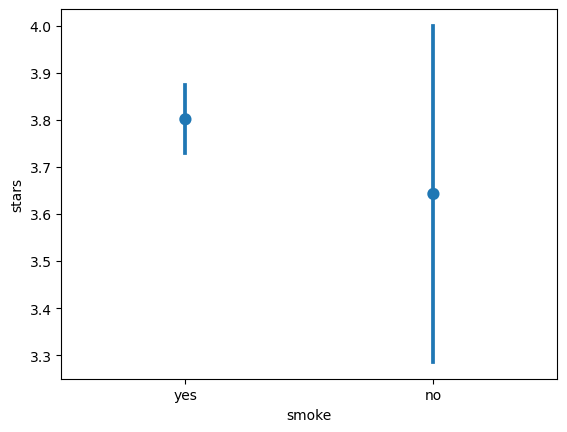

In [112]:
sns.pointplot(x='smoke', y='stars', data=df_closed, join=False, ci=95)

Παρατήρηση

Παρατηρούμε πως τα εστιατόρια που επιτρέπουν το κάπνισμα κυμαίνονται σε μέσο όρο αστεριών 3,72-3,87 δηλαδή έχουν μικρό εύρος τιμών και μέση τιμή 3,8. Αντίθετα τα εστιατόρια που δεν επιτρέπουν το κάπνισμα κυμαίνονται σε μέσο όρο αστεριών 3,3-4 δηλαδή έχουν πολύ μεγάλο εύρος τιμών και μέση τιμή 3,65.

In [113]:
# t-test (test statistical difference)
smoking = df_closed[df_closed['smoke'] =='yes']
no_smoking = df_closed[df_closed['smoke'] == 'no']
stats.ttest_ind(smoking.stars,no_smoking.stars,equal_var=False)

Ttest_indResult(statistic=0.7439254567502128, pvalue=0.48351700128663666)

Συμπέρασμα

Μετά τον υπολογισμό του t-test βλέπουμε πως το p-value έχει τιμή μεγαλύτερη από το 0,05 που σημαίνει πως δεν έχει κάποιο
στατιστικό ενδιαφέρον να βγάλουμε κάποια συμπεράσματα για την συγκεκριμένη υπόθεση.